<a href="https://colab.research.google.com/github/GarimaAgrawal13/Sentimental-Analysis/blob/main/sentimental_analysis(social_media).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description : This is a sentimental analysis program that parses the tweets fetched from Twitter using Python


In [ ]:
#import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
#Load the data
#from google.colab import files
#uploaded=files.upload()


In [ ]:
#Get the data
#logdata=pd.read_csv('Login.csv')


In [ ]:
#Twitter Api credentials
consumerkey="NJs9XFX7QI7siuODonh0ANC27"
consumersecret="xWtDLmB9qIA7jvUpzt70sFQoU7DHFDrOiVHx2aMiYfcYASYTBL"
accesstoken="1259428899026620417-bmmMREmx3mNc2VymtTU1BgoeN87qRF"
accesstokensecret="ywgg5JAjyrOIzDvgpjpBSnz9i03HcW8U8hmBxqBYUWpyJ"

In [ ]:
#Create the authentication object
authenticate=tweepy.OAuthHandler(consumerkey,consumersecret)

#Set the access token and access token secret
authenticate.set_access_token(accesstoken,accesstokensecret)

#Create the API object while parsing in the auth information
api=tweepy.API(authenticate,wait_on_rate_limit=True)


In [ ]:
#Now we want to extract tweets from a twitter user (Let say BILL GATES)
#Extracting 100 tweets from the twitter
posts=api.user_timeline(screen_name="BillGates",count=200,lang="en",tweet_mode="extended")

#Print the last 5 tweets from the account
print("Show the 5 recent tweets: \n")
i=1
for tweet in posts[0:5]:
  print(str(i) + ')' + tweet.full_text + '\n')
  i=i+1


Show the 5 recent tweets: 

1)RT @MichelleObama: Here's what #Juneteenth means to me: https://t.co/KlOoYwdzD5

2)RT @NavigatingNikki: “It’s that clarity of language about the VALUE of black life in America that distinguishes #Juneteenth as emancipation…

3)RT @nationalbook: "And I’ll never lose my faith that you and I can create an anti-racist America where racial disparities are nonexistent.…

4)RT @ClintSmithIII: When I think of emancipation, I think of all of the people who fought for freedom but who never got a chance to experien…

5)RT @kcarterjackson: Happy Juneteenth fam! My latest for the @TheAtlantic. Find joy today! The images from the article alone are giving me l…



In [ ]:
#Create a dataframe with a column called Tweets
df=pd.DataFrame([tweet.full_text for tweet in posts],columns=['Tweets'])

#Show the first 5 rows of data
df.head()

,Tweets
0,RT @MichelleObama: Here's what #Juneteenth mea...
1,RT @NavigatingNikki: “It’s that clarity of lan...
2,"RT @nationalbook: ""And I’ll never lose my fait..."
3,RT @ClintSmithIII: When I think of emancipatio...
4,RT @kcarterjackson: Happy Juneteenth fam! My l...


In [ ]:
#Clean the text
def cleantext(text):
  #r tells python that the expression is ra..
  text=re.sub(r'@[A-Za-z0-9]+','',text) #removed @mentions
  text=re.sub(r'#','',text) #removed hashtag symbol
  text=re.sub(r'RT[\s]+','',text) #removed RT
  text=re.sub(r'https?:\/\/\S+', '', text) #removed the hyper link

  return text

#cleaning the text
df['Tweets']=df['Tweets'].apply(cleantext)

#show the cleaned text
df


,Tweets
0,: Here's what Juneteenth means to me:
1,: “It’s that clarity of language about the VAL...
2,": ""And I’ll never lose my faith that you and I..."
3,": When I think of emancipation, I think of all..."
4,: Happy Juneteenth fam! My latest for the . Fi...
...,...
195,"Tomorrow is WorldMosquitoDay, when we recogniz..."
196,I never really learned how to cook. I’m finall...
197,Four billion people are at risk from mosquito-...
198,I learned a lot from Washington State Teacher ...


In [ ]:
#subjectivity and ploarity
#Create a function to get the subjectivity
def getsubjectivity(text):
  return TextBlob(text).sentiment.subjectivity


#Create a function to get the polarity
def getpolarity(text):
  return TextBlob(text).sentiment.polarity


#create two new columns
df['Subjectivity']=df['Tweets'].apply(getsubjectivity)
df['Polarity']=df['Tweets'].apply(getpolarity)

#New dataframe with new things
df

,Tweets,Subjectivity,Polarity
0,: Here's what Juneteenth means to me:,0.000000,0.000000
1,: “It’s that clarity of language about the VAL...,0.433333,-0.166667
2,": ""And I’ll never lose my faith that you and I...",0.000000,0.000000
3,": When I think of emancipation, I think of all...",0.000000,0.000000
4,: Happy Juneteenth fam! My latest for the . Fi...,0.700000,0.833333
...,...,...,...
195,"Tomorrow is WorldMosquitoDay, when we recogniz...",0.000000,0.000000
196,I never really learned how to cook. I’m finall...,0.466667,0.033333
197,Four billion people are at risk from mosquito-...,0.371717,-0.009596
198,I learned a lot from Washington State Teacher ...,0.950000,-0.600000


In [ ]:
#understanding the sentiments 
#word cloud


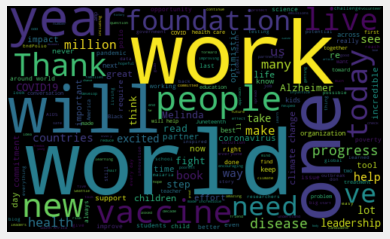

In [ ]:
#Plot the Word Cloud
allwords=' '.join([twts for twts in df['Tweets']])
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allwords)

plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#Create a function to compute the negative,neutral and positive analysis
def getanalysis(score):
  if score<0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'


df['Analysis']=df['Polarity'].apply(getanalysis)

#showing the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,: Here's what Juneteenth means to me:,0.000000,0.000000,Neutral
1,: “It’s that clarity of language about the VAL...,0.433333,-0.166667,Negative
2,": ""And I’ll never lose my faith that you and I...",0.000000,0.000000,Neutral
3,": When I think of emancipation, I think of all...",0.000000,0.000000,Neutral
4,: Happy Juneteenth fam! My latest for the . Fi...,0.700000,0.833333,Positive
...,...,...,...,...
195,"Tomorrow is WorldMosquitoDay, when we recogniz...",0.000000,0.000000,Neutral
196,I never really learned how to cook. I’m finall...,0.466667,0.033333,Positive
197,Four billion people are at risk from mosquito-...,0.371717,-0.009596,Negative
198,I learned a lot from Washington State Teacher ...,0.950000,-0.600000,Negative


In [ ]:
#Print all of the positive tweets
j=1
#sorting as the first one is most postive
sorteddf=df.sort_values(by=['Polarity'])
#iterating through rows in sorted dataframe
for i in range(0,sorteddf.shape[0]):
  if(sorteddf['Analysis'][i]=='Positive'):
    print(str(j) + ') '+sorteddf['Tweets'][i])
    print()
    j=j+1



1) : Happy Juneteenth fam! My latest for the . Find joy today! The images from the article alone are giving me l…

2) : Proud to share my thoughts in ’s “injustice issue” on (and for) our beloved young people I call the TrayvonGene…

3) : Opal is 93 years old and a great interview. Take a listen 

4) I am committed to listening and learning more about systemic racism and what I can do with my actions and words to help create a more equal and just future. Black lives matter.

5) : Today world leaders pledged to fully support ’s mission to give more children access to lifesaving vaccines and b…

6) I continue to be inspired by all of the volunteers (including many retired health care workers and teachers) on the front lines of the fight against coronavirus each day. 

7) Here are five books to read this summer if you want to learn more about pandemics or are looking for a distraction:  

8) Melinda recommended that I read The Choice, and I’m glad she did. I think many people will find co

In [ ]:
#Print all of the negative tweets
j=1
sorteddf=df.sort_values(by=['Polarity'],ascending='False')
#iterating through rows in sorted dataframe
for i in range(0,sorteddf.shape[0]):
  if(sorteddf['Analysis'][i]=='Negative'):
    print(str(j) + ') '+sorteddf['Tweets'][i])
    print()
    j=j+1

1) : “It’s that clarity of language about the VALUE of black life in America that distinguishes Juneteenth as emancipation…

2) : “Only those feigning blindness fail to see the body of work we are, and the work of body we have done. 

Everything is what it is…

3) : Juneteenth recognizes &amp; celebrates Black people’s freedom and the end of slavery in the US!  19 Jun 1865 Union Army Genera…

4) _Nyongo: 1. This is Opal Lee, the force behind the movement to make Juneteenth a national holiday. Also known as Freedom Day, it…

5) …in policing, criminal justice, education, health care, housing, the workplace and all other areas of their lives.

6) The horrifying killings of George Floyd, Ahmaud Arbery, Breonna Taylor and far too many other Black people—and the protests they sparked—are shining a light on the brutal injustices that Black people experience every day…

7) : The video of George Floyd’s brutal death broke my heart. I’ve watched the protests that followed and have felt overwhelm

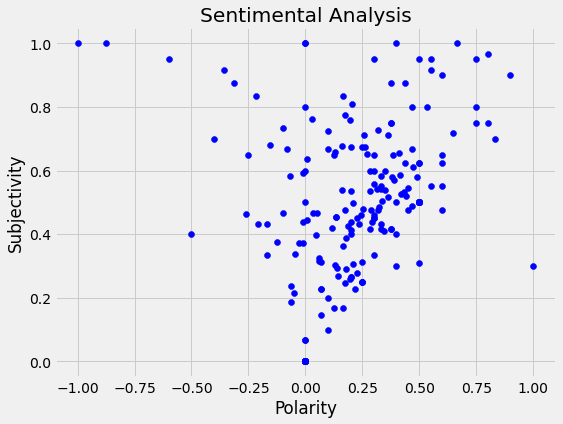

In [ ]:
#plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')

plt.title('Sentimental Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
#Get the percentage of positive tweets
ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['Tweets']

ptweets

4      : Happy Juneteenth fam! My latest for the . Fi...
9      : Proud to share my thoughts in ’s “injustice ...
11     : Opal is 93 years old and a great interview. ...
12     I am committed to listening and learning more ...
15     : Today world leaders pledged to fully support...
                             ...                        
191    When I think about the world I want for my chi...
193    If we want to give our kids the best chance po...
194    Today marks three years since Nigeria's last w...
196    I never really learned how to cook. I’m finall...
199    Melinda and I are big fans of , and we were th...
Name: Tweets, Length: 150, dtype: object

In [ ]:
round( (ptweets.shape[0] / df.shape[0]) *100,1 )


75.0

In [ ]:
#Get the percentage of negative tweets
ntweets=df[df.Analysis=='Negative']
ntweets=ntweets['Tweets']

round( (ntweets.shape[0] / df.shape[0]) *100,1 )

13.5

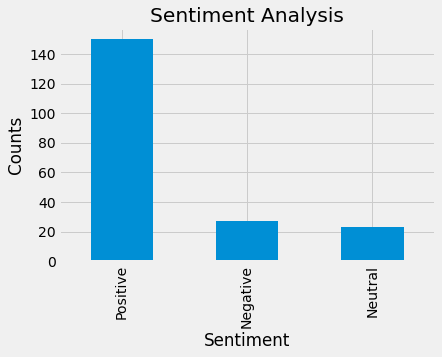

In [ ]:
#show the value counts

df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
"""
sources

https://youtu.be/ujId4ipkBio

can use:(https://youtu.be/1gQ6uG5Ujiw)
"""